## Experiment spin up display

### Load package

In [1]:
import glob
import numpy as np
import netCDF4 as nc

from pandas import date_range
from matplotlib import pyplot as plt
from matplotlib.colors import TwoSlopeNorm

### Load data

In [2]:
# Exp. list
exp_list = ["CNTL", "NCRF", "NSC"]

# Setting date range
cntl_time = date_range("2000-03-01", "2000-08-30", freq="D")
ncrf_time = date_range("2000-04-30", "2000-08-28", freq="D")
nsc_time  = date_range("2000-04-30", "2000-08-30", freq="D")

# path
path = "/works/works/b05209018/MPAS_Aqua/derived_data/"

# Collection of data
file_dict = {
    key: glob.glob(f"{path}{key}/prec/Prec_daily.2000*.nc")
    for key in exp_list
}

# Load data
## Load dimensions
with nc.Dataset(file_dict["CNTL"][0]) as f:
    dims = {
        key: f.variables[key][:]
        for key in f.dimensions.keys()
    }
    
## Load data
data_dict = {
    key: np.stack([nc.Dataset(file).variables["prec_total"] for file in file_dict[key]])
    for key in exp_list
}

data_dict["NCRF"] = np.concatenate((data_dict["CNTL"][:60], data_dict["NCRF"]), axis=0)
data_dict["NSC"]  = np.concatenate((data_dict["CNTL"][:60], data_dict["NSC"]), axis=0)

### Select different range of data

In [3]:
# setting latitude limit
lat_lim = np.where((dims["latitude"] > -5) & (dims["latitude"] < 5))[0]

data_eq = {
    key: data_dict[key][:, lat_lim, :]
    for key in exp_list
}

### Compute latitude-weighted mean value of precipitation

In [12]:
# Global
data_global_mean = {
    key: np.nanmean(data_dict[key], axis=(1, 2))
    for key in exp_list
}

# Equator
data_eq_mean = {
    key: np.nanmean(data_eq[key], axis=(1, 2))
    for key in exp_list
}

## Plot out the evolution

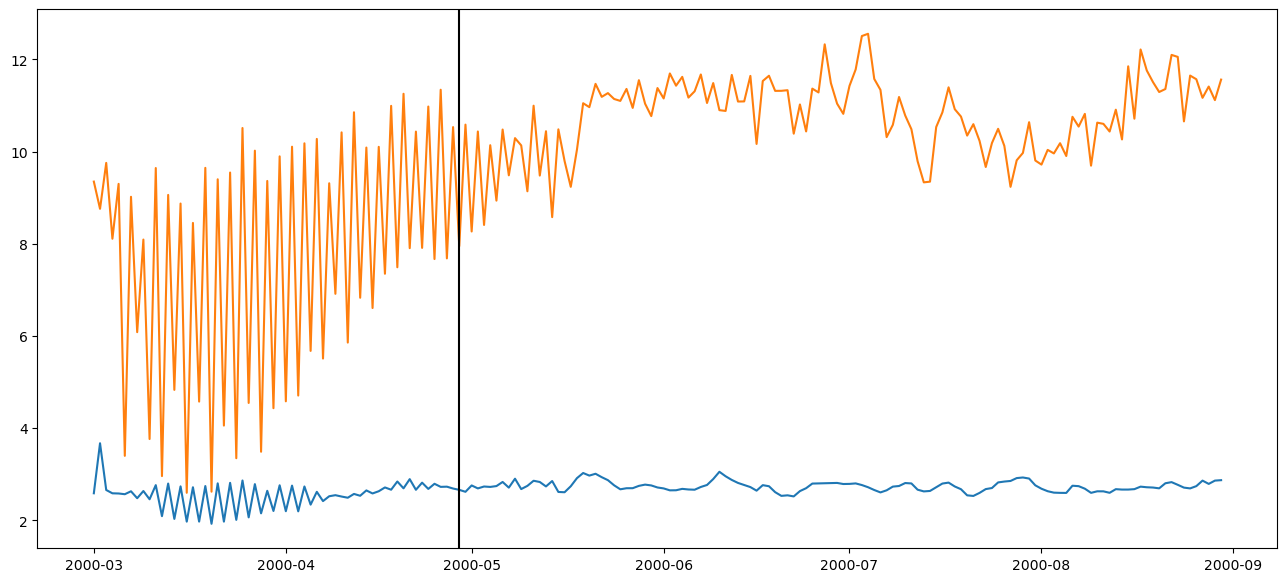

In [14]:
plt.figure(figsize=(16, 7))
plt.plot(cntl_time, data_global_mean["CNTL"], label="CNTL")
plt.plot(cntl_time, data_eq_mean["CNTL"], label="CNTL_eq")
plt.axvline(cntl_time[59], color="k")
